In [1]:
# https://hoonzi-text.tistory.com/19
# https://techblog-history-younghunjo1.tistory.com/114

import pandas as pd
import matplotlib.pyplot as plt
from konlpy.tag import Okt

In [2]:
# 데이터 가져오기
df = pd.read_csv('./Cho/final.csv')
print('data size->', len(df))

data size-> 432


In [3]:
df.head()
# df[:5] # 상위 5개 출력

,Unnamed: 0,Document,tokenizedDocument,dm1,dm2,dm3,dm4,dm5,dm6,dm7,...,dm91,dm92,dm93,dm94,dm95,dm96,dm97,dm98,dm99,dm100
0,0,Structures (구조),구조,0.007571,0.009271,0.001097,-0.008169,0.008288,-0.004031,0.005913,...,0.007559,0.002194,0.005225,0.006544,0.002247,-0.005967,0.000006,0.008078,-0.005902,0.009378
1,1,❖ 운영체제 서비스 (Operating System Services),운영체제 서비스,-0.005408,-0.000432,0.007262,-0.001670,0.006010,-0.000959,0.000174,...,0.002551,-0.001591,0.004295,-0.007675,0.001010,0.001742,0.006994,0.001577,-0.001139,0.006073
2,2,❖ 운영체제 사용자 인터페이스 (User Operating System Interf...,운영체제 사용자 인터페이스,-0.000675,0.002205,0.002081,-0.001569,0.002325,-0.002679,-0.001739,...,0.002227,0.002521,0.003332,-0.001918,0.000750,0.002942,0.006826,-0.002795,0.001198,-0.003668
3,3,❖ 시스템 콜 (System Calls),시스템 콜,-0.003974,0.001280,-0.001124,0.003658,-0.002917,-0.001571,0.004352,...,0.003336,-0.001584,0.004309,-0.001746,0.007100,-0.001170,-0.001359,-0.001529,0.001247,0.004521
4,4,❖ 시스템 콜 유형 (Types of System Calls),시스템 콜 유형,-0.002334,0.003693,-0.002087,0.003426,-0.000884,-0.003205,0.005925,...,0.005083,-0.002419,0.003281,-0.000775,0.007128,0.000114,-0.001930,-0.002375,-0.001803,0.004846


In [4]:
# NULL 값 존재 유무
print(df.isnull().values.any())

False


In [5]:
df = df.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(df.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [6]:
print(len(df)) # 개수 출력

432


In [7]:
okt = Okt() # 형태소 분석기 객체 생성

'''
# Okt의 nouns를 사용한 토큰화
noun_list = []
for content in df['tokenizedDocument']: 
    nouns = okt.nouns(content) # 명사만 추출하기, 결과값은 명사 리스트
    noun_list.append(nouns)
'''

# Okt의 morph를 사용한 토큰화
tokenized_data = []
for sentence in df['tokenizedDocument']:
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    tokenized_data.append(tokenized_sentence)

# 명사 추출 방식의 토큰화에 사용
# df['nouns'] = noun_list
# tokenized_data = df['nouns'].tolist()

# morph 방식의 토큰화에 사용
df['tokenized_data'] = tokenized_data
tokenized_data = df['tokenized_data'].tolist()

최대 길이 : 18
평균 길이 : 4.076388888888889


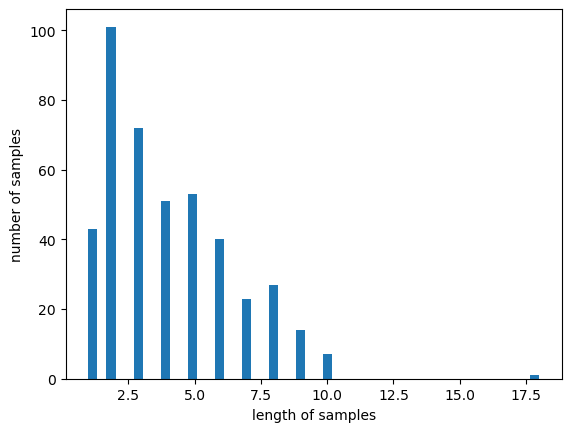

In [8]:
# 길이 분포 확인
print('최대 길이 :',max(len(review) for review in tokenized_data))
print('평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [9]:
tokenized_data[:5] # 상위 5개 출력

[['구조'],
 ['운영체제', '서비스'],
 ['운영체제', '사용자', '인터페이스'],
 ['시스템', '콜'],
 ['시스템', '콜', '유형']]

In [10]:
df_temp = df.iloc[:,[3,102]]

In [11]:
df_temp

,dm1,dm100
0,0.007571,0.009378
1,-0.005408,0.006073
2,-0.000675,-0.003668
3,-0.003974,0.004521
4,-0.002334,0.004846
...,...,...
427,0.000134,-0.001514
428,0.006011,0.000808
429,0.002724,-0.002164
430,-0.000212,-0.005394


## DBSCAN

sklearn.cluster.DBSCAN 이용. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

주요 파라미터:
- `eps`: 서로 이웃으로 간주되는 두 샘플 사이의 최대 거리. 기본값=0.5.
- `min_samples`: 어떤 샘플이 핵심 샘플로 간주되기 위해 자신의 이웃에 존재해야 하는 샘플의 개수(자신도 포함). 기본값=5.

주요 속성:
- `labels_`: 각 샘플의 클러스터 레이블(핵심 샘플의 인덱스). 이상치 샘플의 레이블은 -1.
- `core_sample_indices_`: 핵심 샘플의 인덱스. (핵심 샘플 개수,) 모양의 다차원 배열.
- `components_`: 핵심 샘플. (핵심 샘플 개수, 특성 개수) 모양의 다차원 배열.

In [12]:
# DBSCAN을 활용한 군집화
from sklearn.cluster import DBSCAN

# 자신을 포함하여 특정 거리(eps) 내에 특정 개수(min_samples) 이상의 샘플이 존재하는 샘플을 핵심 샘플로 간주.
# 핵심 샘플로부터 특정 거리 이내에 있는 모든 샘플은 동일한 클러스터에 소속됨
# 이 이웃에는 다른 핵심 샘플이 포함될 수도 있고, 핵심 샘플들의 연속된 이웃이 하나의 클러스터를 형성할 수도 있음.
model = DBSCAN(eps=0.0001,min_samples=5, metric = "cosine")
# metric: 샘플 간의 거리 계산 식으로는 Cosine distance를 이용
result = model.fit_predict(df_temp) # DBSCAN의 .fit_predict() 함수를 사용
# DBSCAN 클러스터링만 수행하는 .fit() 메서드와 달리 클러스터를 계산하고 레이블을 예측한다.

In [13]:
result

array([-1,  0, -1,  0,  1,  2, -1, -1,  3,  0,  3, -1, -1, -1,  3,  0, 14,
        4,  0,  5,  6, -1, -1, -1, -1,  0,  5, -1,  1, -1,  4,  0,  5, -1,
       -1, -1, -1, -1,  8, -1, -1,  7, -1,  1, -1, -1,  0,  5, -1, -1, -1,
       -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, 15, -1,  0, -1, -1,
       -1, -1, -1, -1, -1,  6,  8, -1, -1, -1,  6,  8,  9, 10, -1, -1, -1,
        3, -1, -1, 11, 11, -1, 11, 11,  6, -1, -1, -1, -1, 12, -1, 10, -1,
       -1, -1,  7, -1, 12, -1, -1, -1,  9,  0, -1, -1, -1, -1, -1, -1,  0,
       14, -1, -1, -1, -1, -1, 11, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
        4, -1, 15, -1, -1, -1, -1, -1, -1, -1, -1, -1, 16, -1, -1, -1, 16,
       -1,  0, -1, -1, -1, 13, -1, -1, -1, 14, -1, -1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, 10, -1, -1,  1, 13, -1, -1,  9, -1, -1, -1,  9,
       -1, -1,  1,  8, -1, -1, -1,  7, -1, -1, -1, -1, -1,  1, -1, 14, 10,
        1, -1, -1,  4, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,  4, -1, 13,
       -1, -1,  0,  4, -1

In [14]:
# 각 샘플의 레이블: 핵심 샘플들의 인덱스 또는 이상치 인덱스(-1)
result[:10]

array([-1,  0, -1,  0,  1,  2, -1, -1,  3,  0], dtype=int64)

In [15]:
# 핵심 샘플들
model.components_[:5]

array([[-0.00540833,  0.00607283],
       [-0.00397378,  0.00452111],
       [-0.00233419,  0.00484617],
       [-0.00448953,  0.000215  ],
       [-0.00343807,  0.00509947]])

In [17]:
# 핵심 샘플들의 인덱스
model.core_sample_indices_[:10]

array([ 1,  3,  4,  5,  8,  9, 10, 14, 15, 17], dtype=int64)

In [18]:
df['result'] = result

In [19]:
df.head()

,Unnamed: 0,Document,tokenizedDocument,dm1,dm2,dm3,dm4,dm5,dm6,dm7,...,dm93,dm94,dm95,dm96,dm97,dm98,dm99,dm100,tokenized_data,result
0,0,Structures (구조),구조,0.007571,0.009271,0.001097,-0.008169,0.008288,-0.004031,0.005913,...,0.005225,0.006544,0.002247,-0.005967,0.000006,0.008078,-0.005902,0.009378,[구조],-1
1,1,❖ 운영체제 서비스 (Operating System Services),운영체제 서비스,-0.005408,-0.000432,0.007262,-0.001670,0.006010,-0.000959,0.000174,...,0.004295,-0.007675,0.001010,0.001742,0.006994,0.001577,-0.001139,0.006073,"[운영체제, 서비스]",0
2,2,❖ 운영체제 사용자 인터페이스 (User Operating System Interf...,운영체제 사용자 인터페이스,-0.000675,0.002205,0.002081,-0.001569,0.002325,-0.002679,-0.001739,...,0.003332,-0.001918,0.000750,0.002942,0.006826,-0.002795,0.001198,-0.003668,"[운영체제, 사용자, 인터페이스]",-1
3,3,❖ 시스템 콜 (System Calls),시스템 콜,-0.003974,0.001280,-0.001124,0.003658,-0.002917,-0.001571,0.004352,...,0.004309,-0.001746,0.007100,-0.001170,-0.001359,-0.001529,0.001247,0.004521,"[시스템, 콜]",0
4,4,❖ 시스템 콜 유형 (Types of System Calls),시스템 콜 유형,-0.002334,0.003693,-0.002087,0.003426,-0.000884,-0.003205,0.005925,...,0.003281,-0.000775,0.007128,0.000114,-0.001930,-0.002375,-0.001803,0.004846,"[시스템, 콜, 유형]",1


In [22]:
for cluster_num in set(result):
    # -1,0은 노이즈 판별이 났거나 클러스터링이 안된 경우
    if(cluster_num == -1 or cluster_num == 0): 
        continue
    else:
        print("cluster num : {}".format(cluster_num))
        temp_df = df[df['result'] == cluster_num] # cluster num 별로 조회
        for title in temp_df['Document']:
            print(title) # 토큰별로 나타내도록 한다.
        print()

cluster num : 1
❖ 시스템 콜 유형 (Types of System Calls)
 프로그램을 메모리에 적재, 실행, 실행 종료 (정상 또는 비정상)
정보 교환
시스템 콜 유형 1
시스템 콜 유형 2
시스템 콜 유형 3
시스템 콜 유형 4
 네트워킹과 인터넷

cluster num : 2
❖ 시스템 프로그램 (System Programs)
시스템 프로그램 (System Programs) 1
시스템 프로그램 (System Programs) 2
시스템 프로그램 (System Programs) 3
시스템 프로그램 (System Programs) 4
시스템 프로그램 (System Programs) 5
 시스템 프로그램

cluster num : 3
❖ 운영체제 디버깅 (Operating System Debugging)
❖ 시스템 부팅 (System Boot)
❖ 운영체제 설치, 맞춤화 과정(customization), 부팅하는 방법
– 새로운 명령을 추가해도 셸을 변경시킬 필요가 없다.
❖ 운영체제는 여러 개의 계층(layer, level)으로 구분
하이브리드 시스템 (Hybrid Systems)
❖ iPhone, iPad를 위한 애플 모바일 운영체제
운영체제 디버깅 (Operating-System Debugging)
l 분석을 위해 기록된 시스템 동작의 추적 목록(trace listings)을 사용한다

cluster num : 4
❖ 사용자 프로그램의 적절한 실행과 시스템의 효율적 운용을 담당한다.
 프로그램 실행에서 요구하는 파일 또는 입출력 장치 등의 입출력 서비스
운영체제가 시스템 콜의 결과로
윈도우와 UNIX 시스템 콜
❖ 프로그램 종료 -> 쉘을 재적재
l Exec()을 실행하여 프로그램을 프로세스에
l 초기 운영체제는 어셈블리 언어로 구현

cluster num : 5
❖ 사용자 업무를 수행하는 데 필요한 기능을 제공하는 운영체제 서비스
❖ 사용자 업무를 수행하는 데 필요한 기능을 제공하는 운영체제 서비스
❖ 사용자